In [1]:
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import nltk
import os
import nltk.corpus
import datetime 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
original_df = pd.read_csv("/content/drive/My Drive/Google Collab/coronavirus_final_full.csv")

In [ ]:
original_df.tail(20)

In [4]:
from datetime import datetime

In [5]:
original_df['created_at'] = pd.to_datetime(original_df['created_at'])

In [6]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7436903 entries, 0 to 7436902
Data columns (total 7 columns):
 #   Column      Dtype              
---  ------      -----              
 0   created_at  datetime64[ns, UTC]
 1   loc         object             
 2   text        object             
 3   verified    int64              
 4   number      int64              
 5   month       int64              
 6   mnth_yr     object             
dtypes: datetime64[ns, UTC](1), int64(3), object(3)
memory usage: 397.2+ MB


In [ ]:
!original_df.groupby(original_df['created_at'].dt.strftime('%B'))['number'].sum().sort_values()

In [7]:
n_by_state = original_df.groupby("loc")["text"].count()

In [341]:
n_by_state

loc
AK     22136
AL    115009
AR     42317
AZ    164479
CA    995964
CO    126736
CT     57411
DC       159
DE     29951
FL    503126
GA    268357
GU         3
HI     40943
IA     40255
ID     26368
IL    313563
IN     86836
KS     37509
KY     71652
LA    120406
MA    200938
MD    143813
ME     27898
MI    177440
MN     82929
MO     79205
MP         1
MS     34984
MT     20092
NC    174630
ND      9297
NE     39895
NH    111331
NJ    148704
NM     52108
NV    131457
NY    477737
OH    217093
OK     65309
OR    137885
PA    214751
PR        40
RI     25376
SC    115078
SD     18585
TN    128694
TX    842153
UT     39480
VA    142447
VT     49964
WA    355719
WI     73851
WV     26646
WY      8192
XX         1
Name: text, dtype: int64

In [ ]:
!original_df['month'] = pd.DatetimeIndex(original_df['created_at']).month

In [ ]:
!original_df['mnth_yr'] = original_df['created_at'].apply(lambda x: x.strftime('%B-%Y')) 

In [ ]:
original_df.tail(10)

#Working with specific state data


In [8]:
NY_df = original_df.loc[original_df['loc'] == 'NY']
NY_df['created_at'] = pd.to_datetime(NY_df['created_at'])
NY_df['created_at'] = pd.DatetimeIndex(NY_df['created_at']).date
NY_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,created_at,loc,text,verified,number,month,mnth_yr
25,2020-03-05,NY,stayfrea alert corona virus spread through mon...,0,1,3,March-2020
46,2020-03-05,NY,rather corona than catch feels another ever ag...,0,1,3,March-2020
76,2020-03-05,NY,thomaskaine strange trump republicans response...,0,1,3,March-2020
83,2020-03-05,NY,microsoft stopping posts with coronavirus dist...,0,1,3,March-2020
113,2020-03-05,NY,gainbos whole entire world corona virus danger...,0,1,3,March-2020


In [9]:
# NY_df= NY_df.groupby('created_at')['number'].sum()
NY_df

,created_at,loc,text,verified,number,month,mnth_yr
25,2020-03-05,NY,stayfrea alert corona virus spread through mon...,0,1,3,March-2020
46,2020-03-05,NY,rather corona than catch feels another ever ag...,0,1,3,March-2020
76,2020-03-05,NY,thomaskaine strange trump republicans response...,0,1,3,March-2020
83,2020-03-05,NY,microsoft stopping posts with coronavirus dist...,0,1,3,March-2020
113,2020-03-05,NY,gainbos whole entire world corona virus danger...,0,1,3,March-2020
...,...,...,...,...,...,...,...
7436767,2020-04-29,NY,thedailybeast coronavirus lockdowns matter lif...,0,1,4,April-2020
7436778,2020-04-29,NY,garrisonbpppg tim_at_where agree except corona...,0,1,4,April-2020
7436829,2020-04-29,NY,reached more than million confirmed cases covi...,0,1,4,April-2020
7436873,2020-04-29,NY,tiktok also added donation stickers platform w...,0,1,4,April-2020


In [ ]:
!NY_df.to_csv("/content/drive/My Drive/Google Collab/NY_data_datecount.csv")

In [10]:
NY_df=pd.read_csv("/content/drive/My Drive/Google Collab/NY_data_datecount1.csv")

In [11]:
NY_df['created_at'] = pd.to_datetime(NY_df['created_at'])           #Converting date to datetime format
NY_df.dropna(subset = ["number_of_tweets"], inplace=True)           #removing empty rows from df
NY_df['number_of_tweets'] = NY_df["number_of_tweets"].astype(int)   #Converting float to int
NY_df = NY_df.drop(columns=['number'])                              #Droping unwanted columns

In [12]:
NY_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 4 to 59
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   created_at        56 non-null     datetime64[ns]
 1   Cases             56 non-null     int64         
 2   Hospitalized      56 non-null     int64         
 3   Deaths            56 non-null     int64         
 4   number_of_tweets  56 non-null     int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 2.6 KB


In [ ]:
!NY_plot = sns.catplot(x='created_at', y='number_of_tweets', hue='Cases', data=NY_df, kind='bar', col='created_at', col_wrap=3, palette='muted',height=8.5, aspect=1.1);

In [ ]:
# sns.relplot(x="created_at", y="number_of_tweets", hue="Cases", kind="line", data=NY_df);

x=NY_df['created_at']
y1=NY_df['number_of_tweets']
y2=NY_df['Cases']
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(x, y1)
ax1.set_ylabel('number_of_tweets')
ax1.set_xlabel('NY cases date')

ax2 = ax1.twinx()
plt.gcf().autofmt_xdate()
ax2.plot(x, y2, 'r-')
ax2.set_ylabel('Cases', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

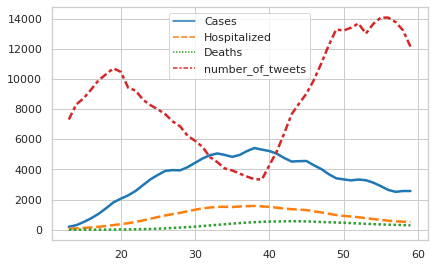

In [350]:
sns.set(style="whitegrid")  
data = NY_df.rolling(10).mean(dates=['created_at'], freq="W",columns=["number_of_tweets", "Cases", "Hospitalized", "Deaths"])  
  
sns.lineplot(data=data, legend='brief', palette="tab10", linewidth=2.5)  

#multivariate regression modeling


In [12]:
from sklearn import linear_model

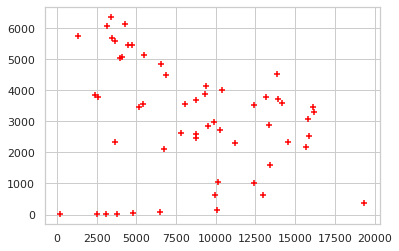

In [13]:
%matplotlib inline
plt.scatter(NY_df.number_of_tweets, NY_df.Cases, color='red', marker='+')

In [14]:
reg = linear_model.LinearRegression()
reg.fit(NY_df[['created_at']], NY_df.Cases)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
reg.predict(2020-04-29)

SyntaxError: ignored

In [15]:
reg = linear_model.LinearRegression()
reg.fit(NY_df['Cases', 'number_of_tweets'], NY_df.created_at)

KeyError: ignored

#prophet

In [ ]:
!pip install fbprophet

In [12]:
# check prophet version
import fbprophet
# print version number
print('Prophet %s' % fbprophet.__version__)

Prophet 0.7.1


In [13]:
# load the dataset
from pandas import read_csv
# load data
# path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
# df = read_csv(path, header=0)
# summarize shape
print(NY_df.shape)
# show first few rows
print(NY_df.head())

(56, 5)
  created_at  Cases  Hospitalized  Deaths  number_of_tweets
4 2020-03-05      3            20       0               181
5 2020-03-06      8            18       0              2495
6 2020-03-07      7            15       0              3082
7 2020-03-08     21            17       0              3758
8 2020-03-09     58            49       0              4767


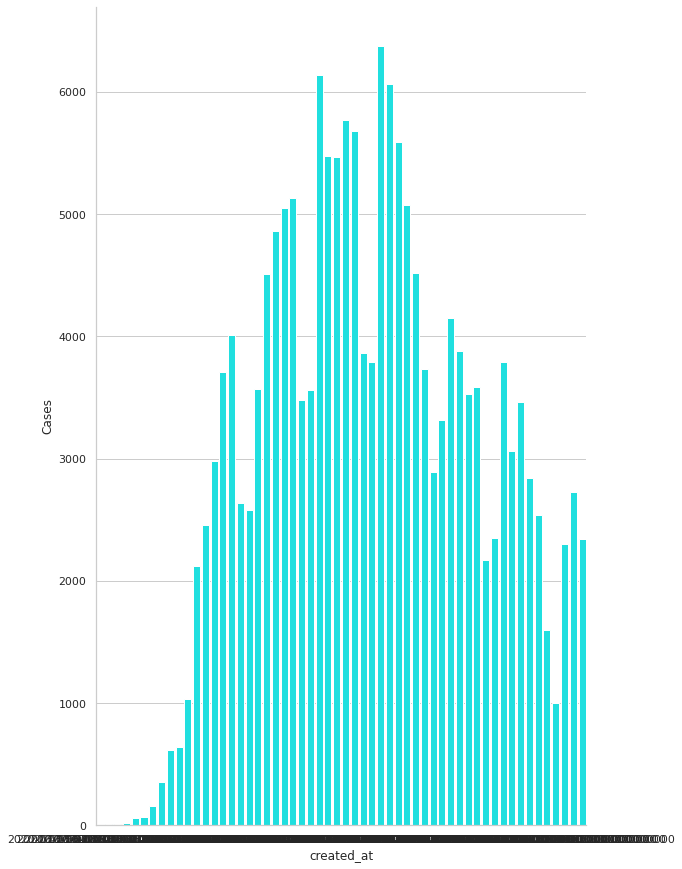

In [25]:
# load and plot the car sales dataset
# from pandas import read_csv
from matplotlib import pyplot
# prepare expected column names
NY_df.columns = ['created_at', 'Cases', 'Hospitalized', 'Deaths', 'number_of_tweets']
NY_df['created_at']= pd.to_datetime(NY_df['created_at'])
# # load and plot the car sales dataset
sns.catplot(
    data=NY_df,
    x='created_at',
    y='Cases',
#     row='created_at',
    kind='bar',
    height=12, 
    aspect=.8,
    color='cyan')
#  plt.gcf().autofmt_xdate()

In [34]:
# fit prophet model on the car sales dataset
from pandas import read_csv
from pandas import to_datetime
from fbprophet import Prophet
# prepare expected column names
df= pd.DataFrame(columns=['ds', 'y'])
df['ds']= to_datetime(NY_df['created_at'])
df['y'] = NY_df["Cases"].astype(int)
df.dropna(subset = ["ds"], inplace=True)
df

,ds,y
4,2020-03-05,3
5,2020-03-06,8
6,2020-03-07,7
7,2020-03-08,21
8,2020-03-09,58
9,2020-03-10,70
10,2020-03-11,155
11,2020-03-12,357
12,2020-03-13,620
13,2020-03-14,644


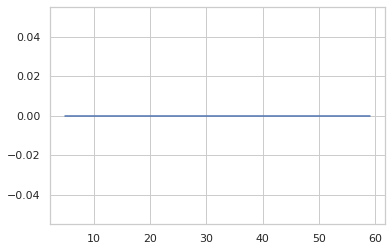

In [33]:
df['y'].plot()

In [30]:
df

,ds,y
4,2020-03-05,3
5,2020-03-06,8
6,2020-03-07,7
7,2020-03-08,21
8,2020-03-09,58
9,2020-03-10,70
10,2020-03-11,155
11,2020-03-12,357
12,2020-03-13,620
13,2020-03-14,644


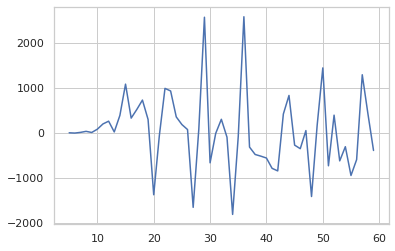

In [35]:
df['y']=df['y']-df['y'].shift(1)
df['y'].plot()

In [36]:
# define the model
model = Prophet()
# fit the model
model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [37]:
model

In [38]:
model.seasonalities

OrderedDict([('weekly',
              {'condition_name': None,
               'fourier_order': 3,
               'mode': 'additive',
               'period': 7,
               'prior_scale': 10.0})])

In [39]:
future_dates = model.make_future_dataframe(periods=365)
future_dates.tail()

,ds
416,2021-04-25
417,2021-04-26
418,2021-04-27
419,2021-04-28
420,2021-04-29


In [40]:
prediction = model.predict(future_dates)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-05,300.803617,-424.130347,912.749141,300.803617,300.803617,-49.343873,-49.343873,-49.343873,-49.343873,-49.343873,-49.343873,0.0,0.0,0.0,251.459743
1,2020-03-06,291.547005,-474.039140,882.575375,291.547005,291.547005,-96.393796,-96.393796,-96.393796,-96.393796,-96.393796,-96.393796,0.0,0.0,0.0,195.153209
2,2020-03-07,282.290393,-1449.290537,-92.808328,282.290393,282.290393,-1049.234271,-1049.234271,-1049.234271,-1049.234271,-1049.234271,-1049.234271,0.0,0.0,0.0,-766.943878
3,2020-03-08,273.033782,-579.528677,811.994795,273.033782,273.033782,-159.003624,-159.003624,-159.003624,-159.003624,-159.003624,-159.003624,0.0,0.0,0.0,114.030158
4,2020-03-09,263.777170,858.417761,2254.844320,263.777170,263.777170,1267.461344,1267.461344,1267.461344,1267.461344,1267.461344,1267.461344,0.0,0.0,0.0,1531.238514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,2021-04-25,-3549.946791,-4387.670828,-3039.104782,-3549.948944,-3549.944311,-159.003624,-159.003624,-159.003624,-159.003624,-159.003624,-159.003624,0.0,0.0,0.0,-3708.950415
417,2021-04-26,-3559.203403,-2972.189110,-1629.918420,-3559.205560,-3559.200914,1267.461344,1267.461344,1267.461344,1267.461344,1267.461344,1267.461344,0.0,0.0,0.0,-2291.742059
418,2021-04-27,-3568.460014,-4223.857537,-2849.049180,-3568.462176,-3568.457518,77.377785,77.377785,77.377785,77.377785,77.377785,77.377785,0.0,0.0,0.0,-3491.082230
419,2021-04-28,-3577.716626,-4215.580988,-2887.801164,-3577.718792,-3577.714121,9.136436,9.136436,9.136436,9.136436,9.136436,9.136436,0.0,0.0,0.0,-3568.580190


In [33]:
prediction[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
416,2021-04-25,-3708.950415,-4389.468678,-3031.714813
417,2021-04-26,-2291.742059,-2936.418285,-1615.759124
418,2021-04-27,-3491.082230,-4142.610089,-2798.453573
419,2021-04-28,-3568.580190,-4228.345104,-2927.742783
420,2021-04-29,-3636.317111,-4292.297340,-2998.175495


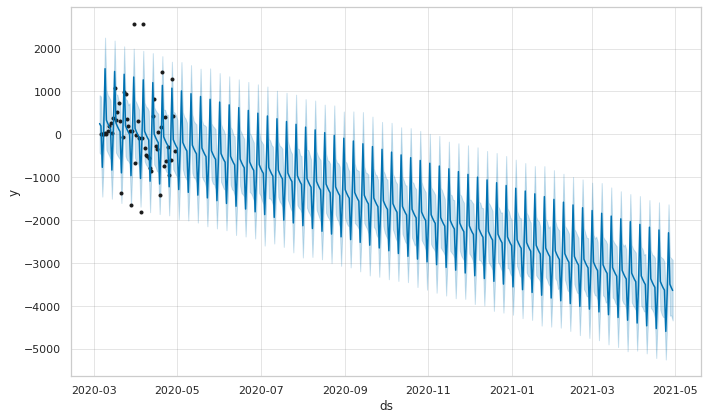

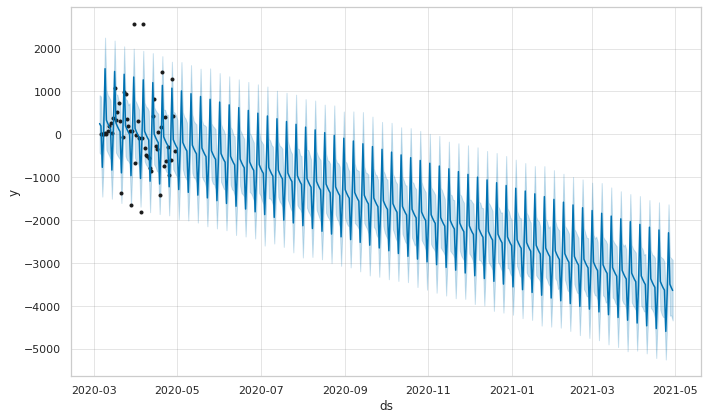

In [41]:
model.plot(prediction)

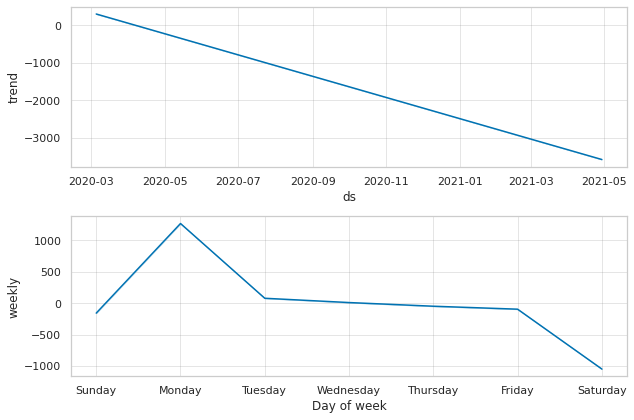

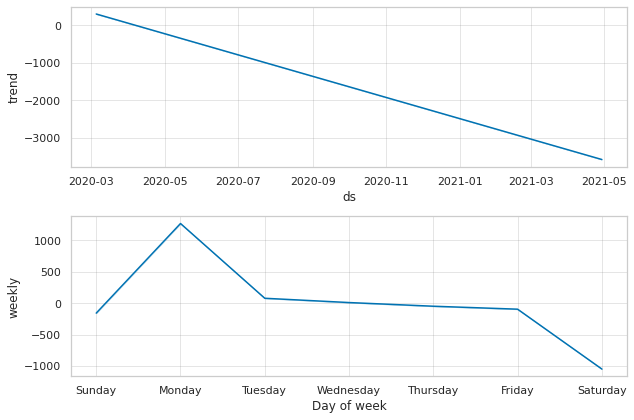

In [42]:
#visualize weekly
model.plot_components(prediction)

In [43]:
#Cross validation
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics

In [44]:
df.shape

(56, 2)

In [45]:
df_cv=cross_validation(model, horizon="30 days", period='180 days', initial='10 days')

INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-03-30 00:00:00 and 2020-03-30 00:00:00


INFO:fbprophet:n_changepoints greater than number of observations. Using 19.


In [46]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-03-31,562.254733,-130.481767,1185.537383,-662.0,2020-03-30
1,2020-04-01,458.570349,-190.301271,1107.742739,-8.0,2020-03-30
2,2020-04-02,510.599501,-114.444857,1176.510298,305.0,2020-03-30
3,2020-04-03,332.194500,-344.499739,1014.900922,-93.0,2020-03-30
4,2020-04-04,-579.863883,-1227.265520,64.236318,-1809.0,2020-03-30
5,2020-04-05,278.902083,-351.015037,927.580702,-74.0,2020-03-30
6,2020-04-06,1343.000509,689.367731,1969.067273,2584.0,2020-03-30
7,2020-04-07,630.548312,-23.305744,1247.809039,-313.0,2020-03-30
8,2020-04-08,526.863928,-162.415376,1169.294013,-477.0,2020-03-30
9,2020-04-09,578.893080,-79.431600,1240.093513,-514.0,2020-03-30


In [47]:
df_performance= performance_metrics(df_cv)
df_performance  # MSE=mean square error, RMSE=root mean square error, MAE=mean absolute error, MAPE=mean absolute percentage error, coverage=estimates of y_hat lower and y_hat upper

,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days,5.862529e+05,765.671535,632.141528,20.281573,1.849327,0.666667
1,4 days,1.469165e+05,383.296842,365.788117,21.189125,4.571984,1.000000
2,5 days,5.779457e+05,760.227403,619.976706,1.975179,0.679456,0.666667
3,6 days,6.053686e+05,778.054376,669.077567,3.340129,4.571984,0.666667
4,7 days,1.058465e+06,1028.817316,941.012564,1.976222,0.679456,0.333333
5,8 days,8.516343e+05,922.840368,845.816629,2.754580,3.014531,0.333333
6,9 days,1.146035e+06,1070.530389,1062.803910,1.866444,2.104537,0.000000
7,10 days,1.030814e+06,1015.290022,1013.435107,2.415106,2.126251,0.000000
8,11 days,1.039009e+06,1019.317994,1017.748362,1.983697,2.104537,0.000000
9,12 days,7.280162e+05,853.238640,774.270285,1.398291,1.720302,0.333333


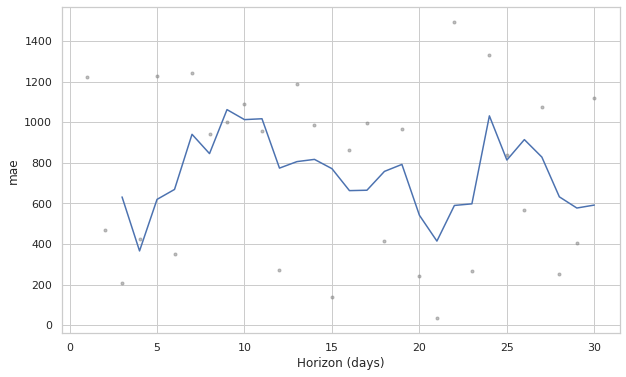

In [48]:
from fbprophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv, metric='mae')

### STS models vs decompose 

In [77]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

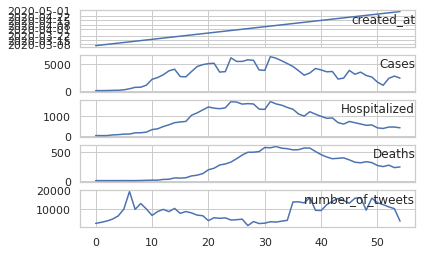

In [99]:

values = NY_df.values
groups = [0, 1, 2, 3, 4]
i=1


pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[1:, group])
	pyplot.title(NY_df.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

###LSTM for forecasting 

In [109]:
# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 


In [223]:
# load dataset
# dataset = read_csv('pollution.csv', header=0, index_col=0)
n_df = NY_df.iloc[: , 1:]
values = n_df.values
# integer encode direction
encoder = LabelEncoder()

# values[:,2:] = encoder.fit_transform(values[:,2:])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
# reframed.drop(reframed.columns[[]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  ...   var2(t)  var3(t)   var4(t)
1   0.000000   0.002927        0.0  ...  0.001756      0.0  0.120678
2   0.000784   0.001756        0.0  ...  0.000000      0.0  0.151291
3   0.000628   0.000000        0.0  ...  0.001171      0.0  0.186545
4   0.002824   0.001171        0.0  ...  0.019906      0.0  0.239166
5   0.008629   0.019906        0.0  ...  0.028103      0.0  0.327771

[5 rows x 8 columns]


In [166]:
# split into train and test sets
values = reframed.values
n_train_hours = 365 * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

NameError: ignored

In [ ]:
from keras.models import Sequential
# import numpy as np
from keras.models import Sequential
from keras.layers import Dense,LSTM
import keras
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
# keras.callbacks.ModelCheckpoint(test, monitor='val_loss', verbose=0, save_best_only=False)
history = model.fit(train_X, train_y, epochs=50, batch_size=20, validation_data=(test_X, test_y),validation_split=0.57, verbose=1, shuffle=True)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [241]:
test_X

array([], shape=(0, 1, 7), dtype=float32)

In [260]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

ValueError: ignored

=================================================================


In [ ]:
NY_df

In [ ]:
len(NY_df)

In [64]:

train = NY_df.iloc [:45]
test = NY_df.iloc [45:]

In [ ]:
train

In [66]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [59]:
df.head(), df.tail()

(          ds     y
 4 2020-03-05   NaN
 5 2020-03-06   5.0
 6 2020-03-07  -1.0
 7 2020-03-08  14.0
 8 2020-03-09  37.0,            ds       y
 55 2020-04-25  -944.0
 56 2020-04-26  -592.0
 57 2020-04-27  1295.0
 58 2020-04-28   432.0
 59 2020-04-29  -388.0)

In [72]:
wrapped_model = TransformedTargetRegressor(regressor=model, transformer=MinMaxScaler())


NameError: ignored

In [69]:


from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 24
n_features = 1
generator = TimeseriesGenerator(sclaed_train, sclaed_train, length = n_input, batch_size=1)

NameError: ignored

In [ ]:
!original_df.to_csv('coronavirus_final_full.csv', index=False)

In [44]:
final1 = original_df.groupby(['mnth_yr','loc'], as_index=False, sort=False).count()
final1

,mnth_yr,loc,created_at,text,verified,number,month
0,March-2020,MI,71829,71829,71829,71829,71829
1,March-2020,UT,16038,16038,16038,16038,16038
2,March-2020,TX,444894,444894,444894,444894,444894
3,March-2020,MA,74094,74094,74094,74094,74094
4,March-2020,NJ,73060,73060,73060,73060,73060
...,...,...,...,...,...,...,...
103,April-2020,ND,6074,6074,6074,6074,6074
104,April-2020,DC,86,86,86,86,86
105,April-2020,PR,22,22,22,22,22
106,April-2020,MP,1,1,1,1,1


In [58]:
final_df = final1.drop(columns=['created_at', 'text', 'verified','month'])
final_df
# final.to_csv("/content/drive/My Drive/Google Collab/coronavirus_monthvsloc_final.csv", index = False)

,mnth_yr,loc,number
0,March-2020,MI,71829
1,March-2020,UT,16038
2,March-2020,TX,444894
3,March-2020,MA,74094
4,March-2020,NJ,73060
...,...,...,...
103,April-2020,ND,6074
104,April-2020,DC,86
105,April-2020,PR,22
106,April-2020,MP,1


In [ ]:
final_df = pd.read_csv("/content/drive/My Drive/Google Collab/coronavirus_monthvsloc_final.csv")

In [46]:
final_df

,mnth_yr,loc,number
0,March-2020,MI,71829
1,March-2020,UT,16038
2,March-2020,TX,444894
3,March-2020,MA,74094
4,March-2020,NJ,73060
...,...,...,...
103,April-2020,ND,6074
104,April-2020,DC,86
105,April-2020,PR,22
106,April-2020,MP,1


In [ ]:
# grouped.apply(lambda x:x.value_counts())

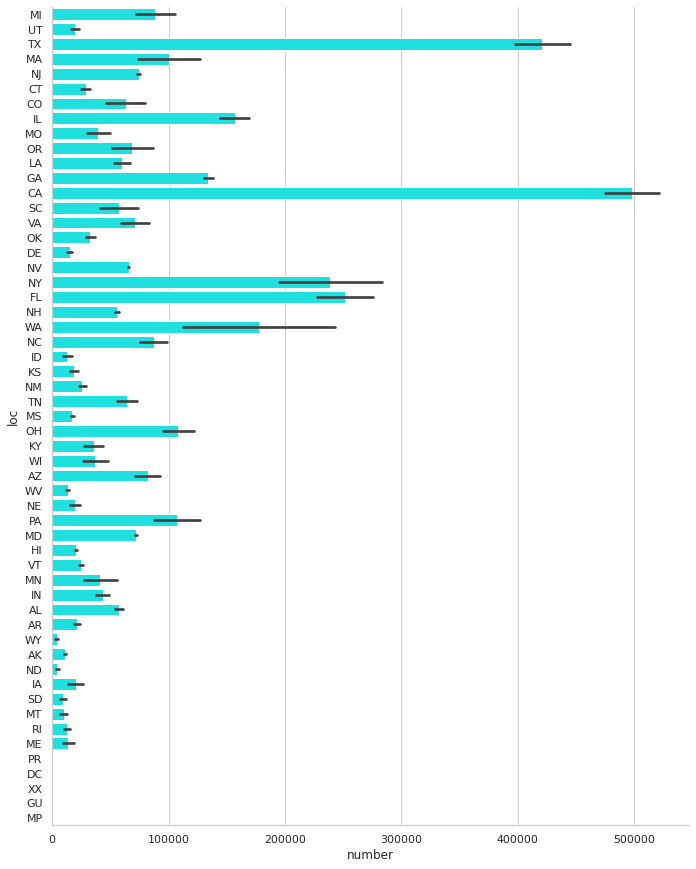

In [47]:

sns.catplot(
    data=final_df,
    x='number',
    y='loc',
#     row='created_at',
    kind='bar',
    height=12, 
    aspect=.8,
    color='cyan')

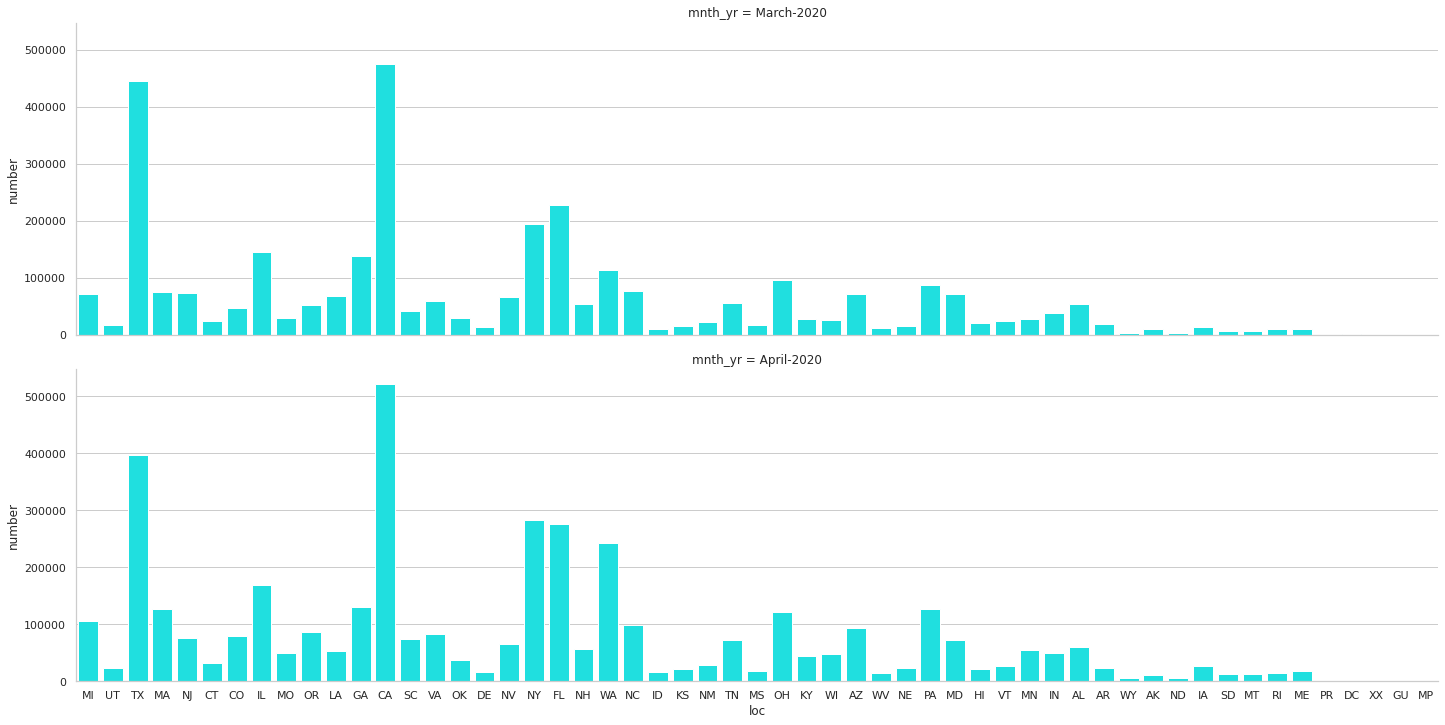

In [48]:
sns.catplot(
    data=final_df,
    x='loc',
    y='number',
    row='mnth_yr',
    kind='bar',
    height=5, 
    aspect=4,
    color='cyan')


In [49]:
final_df2 = final_df.set_index('loc').to_dict()['number']

# mnth_yr	loc	number

In [50]:
final_df2['CA']

521240

In [ ]:
original_df.head()

,created_at,loc,text,verified,number,month,mnth_yr
0,2020-03-05 21:39:41+00:00,MI,stayfrea alert corona virus spread through mon...,0,1,3,March-2020
1,2020-03-05 21:39:42+00:00,UT,matrodamusic corona virus temporary house musi...,0,1,3,March-2020
2,2020-03-05 21:39:42+00:00,TX,gainbos whole entire world corona virus danger...,0,1,3,March-2020
3,2020-03-05 21:39:44+00:00,MA,ellanjeferguson krystallsheree corona virus,0,1,3,March-2020
4,2020-03-05 21:39:44+00:00,NJ,bradleoy corona virus said https wwfteavdch,0,1,3,March-2020


In [284]:
final_text = original_df.drop(columns=['created_at', 'number', 'verified','month'])
final_text
# !final_text.to_csv("/content/drive/My Drive/Google Collab/coronavirus_textvsmonthvsloc.csv", index = False)

,loc,text,mnth_yr
0,MI,stayfrea alert corona virus spread through mon...,March-2020
1,UT,matrodamusic corona virus temporary house musi...,March-2020
2,TX,gainbos whole entire world corona virus danger...,March-2020
3,MA,ellanjeferguson krystallsheree corona virus,March-2020
4,NJ,bradleoy corona virus said https wwfteavdch,March-2020
...,...,...,...
7436898,PA,approves billion loan india fight covid https ...,April-2020
7436899,CA,foxla using convalescent plasma chicago hospit...,April-2020
7436900,TX,jobs lost them corona virus didn check answer ...,April-2020
7436901,TX,when warned everyone february that pence doesn...,April-2020


In [285]:
final_text


,loc,text,mnth_yr
0,MI,stayfrea alert corona virus spread through mon...,March-2020
1,UT,matrodamusic corona virus temporary house musi...,March-2020
2,TX,gainbos whole entire world corona virus danger...,March-2020
3,MA,ellanjeferguson krystallsheree corona virus,March-2020
4,NJ,bradleoy corona virus said https wwfteavdch,March-2020
...,...,...,...
7436898,PA,approves billion loan india fight covid https ...,April-2020
7436899,CA,foxla using convalescent plasma chicago hospit...,April-2020
7436900,TX,jobs lost them corona virus didn check answer ...,April-2020
7436901,TX,when warned everyone february that pence doesn...,April-2020


In [286]:
df_stack = original_df.drop(columns=['created_at', 'mnth_yr', 'verified','text'])
df_stack = df_stack.groupby(['month','loc'], as_index=False, sort=False).count()
df_stack


,month,loc,number
0,3,MI,71829
1,3,UT,16038
2,3,TX,444894
3,3,MA,74094
4,3,NJ,73060
...,...,...,...
103,4,ND,6074
104,4,DC,86
105,4,PR,22
106,4,MP,1


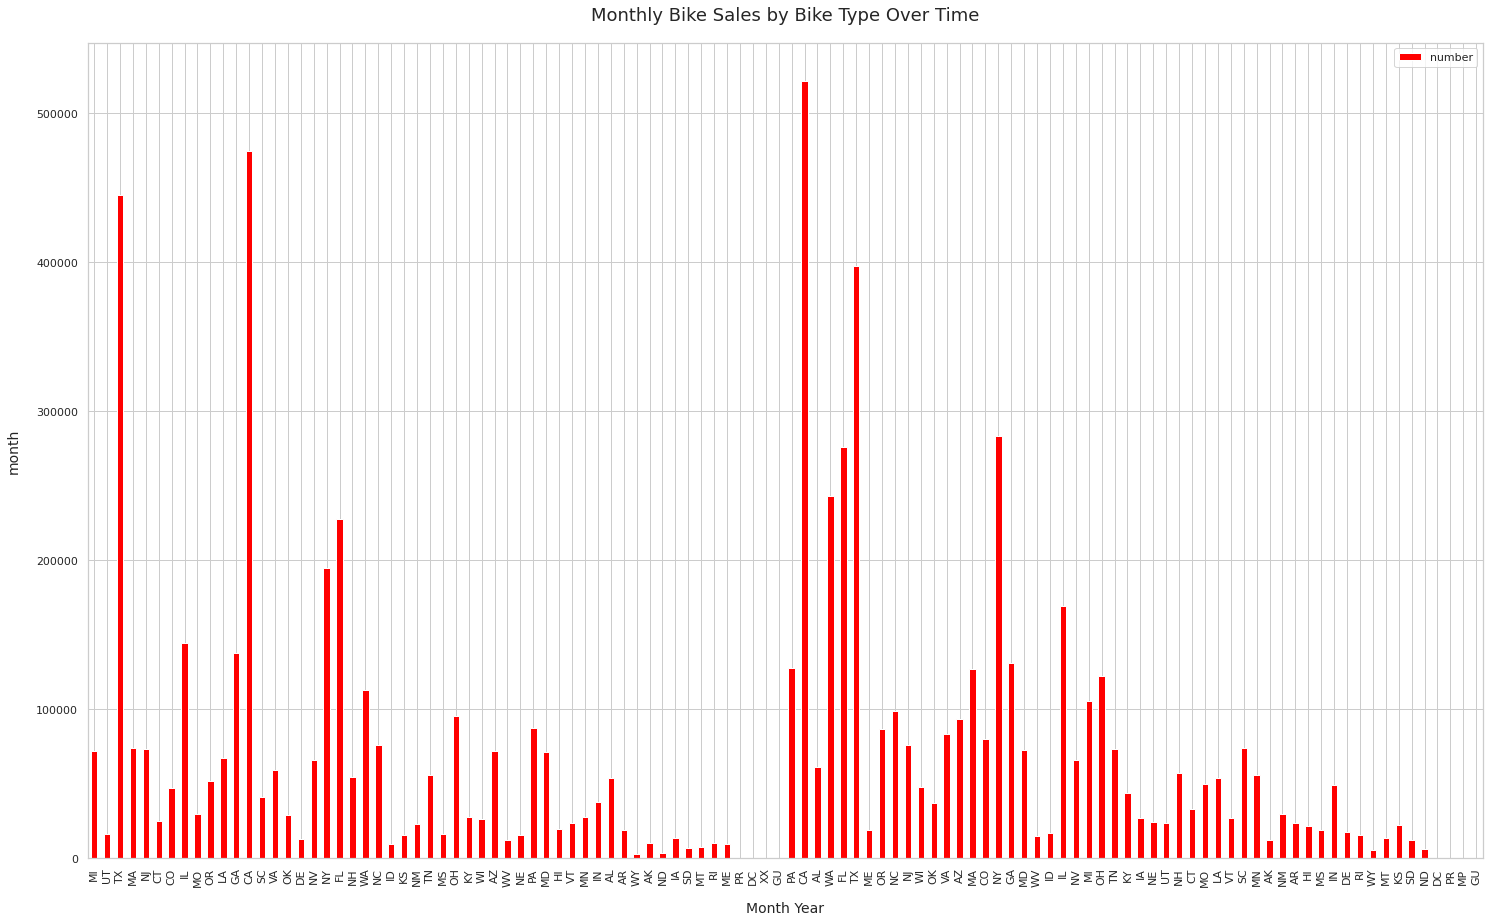

In [ ]:
final_df.set_index('loc')[['number', 'mnth_yr']].plot(kind='bar', stacked=True, color='red', figsize=(25, 15))
plt.xticks(rotation=90)
plt.ylabel("month", fontsize=14, labelpad=15)
plt.xlabel("Month Year", fontsize=14, labelpad=15)
plt.title("Monthly Bike Sales by Bike Type Over Time", fontsize=18, y=1.02);

In [ ]:
# order_list = ['Very Low Wage','Low Wage','Medium Wage','High Wage','Very High Wage']
g = sns.catplot(x='loc', y='number', hue='mnth_yr', data=final_text, kind='bar', col='mnth_yr', col_wrap=3, palette='muted',height=5.0, aspect=2.5);

# order=order_list,

In [291]:
final_text_CA = final_text.loc[final_text['loc'] == 'CA']

In [299]:
final_text_NY = final_text.loc[final_text['loc'] == 'NY']

In [301]:
#final_text_CA
final_text_NY

,loc,text,mnth_yr
25,NY,stayfrea alert corona virus spread through mon...,March-2020
46,NY,rather corona than catch feels another ever ag...,March-2020
76,NY,thomaskaine strange trump republicans response...,March-2020
83,NY,microsoft stopping posts with coronavirus dist...,March-2020
113,NY,gainbos whole entire world corona virus danger...,March-2020
...,...,...,...
7436767,NY,thedailybeast coronavirus lockdowns matter lif...,April-2020
7436778,NY,garrisonbpppg tim_at_where agree except corona...,April-2020
7436829,NY,reached more than million confirmed cases covi...,April-2020
7436873,NY,tiktok also added donation stickers platform w...,April-2020


# **Text analysis**

In [293]:
from textblob import TextBlob
from wordcloud import WordCloud
import re
plt.style.use('fivethirtyeight')

In [302]:
#Create a function to get the subjectivity which tells how much subjective or opinionated the text is

def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity which tells how much positive or negative the text is

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#Create two new columns ########
final_text_NY['Subjectivity'] = final_text_NY['text'].apply(getSubjectivity)
final_text_NY['Polarity'] = final_text_NY['text'].apply(getPolarity)

#Show df ###########
final_text_NY

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,loc,text,mnth_yr,Subjectivity,Polarity
25,NY,stayfrea alert corona virus spread through mon...,March-2020,0.000000,0.000000
46,NY,rather corona than catch feels another ever ag...,March-2020,0.000000,0.000000
76,NY,thomaskaine strange trump republicans response...,March-2020,0.150000,-0.050000
83,NY,microsoft stopping posts with coronavirus dist...,March-2020,0.000000,0.000000
113,NY,gainbos whole entire world corona virus danger...,March-2020,0.641667,-0.133333
...,...,...,...,...,...
7436767,NY,thedailybeast coronavirus lockdowns matter lif...,April-2020,0.000000,0.000000
7436778,NY,garrisonbpppg tim_at_where agree except corona...,April-2020,0.000000,0.000000
7436829,NY,reached more than million confirmed cases covi...,April-2020,0.666667,0.466667
7436873,NY,tiktok also added donation stickers platform w...,April-2020,0.800000,0.600000


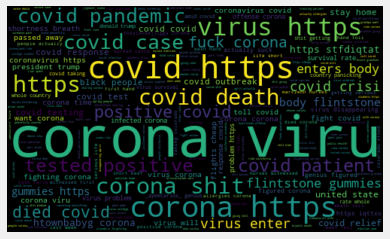

In [295]:
# plot The Word Cloud

allWords = ' '.join( [twts for twts in final_text_CA['text']] )      ###########
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size =119).generate(allWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [320]:
#Create a function to compute the negative, neutral and positive analysis

def getAnalyis(score):
  if score > 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

final_text_NY['Analysis'] = final_text_NY['Polarity'].apply(getAnalyis)    ##########

#show df   #########
final_text_NY.tail(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,loc,text,mnth_yr,Subjectivity,Polarity,Analysis
7436620,NY,scottwongdc georgia drank disinfectants effort...,April-2020,0.000000,0.000000,Neutral
7436644,NY,thou shall tempt coronavirus mike pence visits...,April-2020,0.000000,0.000000,Neutral
7436645,NY,dont know thats possible tuberculosis caused b...,April-2020,0.750000,0.000000,Neutral
7436698,NY,early days covid pandemic diamond princess bec...,April-2020,0.650000,-0.200000,Positive
7436758,NY,when warned everyone february that pence doesn...,April-2020,0.000000,0.000000,Neutral
7436767,NY,thedailybeast coronavirus lockdowns matter lif...,April-2020,0.000000,0.000000,Neutral
7436778,NY,garrisonbpppg tim_at_where agree except corona...,April-2020,0.000000,0.000000,Neutral
7436829,NY,reached more than million confirmed cases covi...,April-2020,0.666667,0.466667,Negative
7436873,NY,tiktok also added donation stickers platform w...,April-2020,0.800000,0.600000,Negative
7436887,NY,samsung expects covid hurt smartphone sales in...,April-2020,0.000000,0.000000,Neutral


In [298]:
final_text_CA.tail(10)

,loc,text,mnth_yr,Subjectivity,Polarity,Analysis
7436843,CA,debbieinphx presssec realdonaldtrump excedes m...,April-2020,0.000000,0.000000,Neutral
7436851,CA,jennycohn beloved brooklyn teacher dies corona...,April-2020,1.000000,0.700000,Positive
7436860,CA,vavreck more than third population their incom...,April-2020,0.330000,0.140000,Positive
7436863,CA,even before covid outbreak arkansas ranked nat...,April-2020,0.000000,0.000000,Neutral
7436868,CA,covid hastalarına tedavilerinin ardından test ...,April-2020,0.000000,0.000000,Neutral
7436869,CA,when warned everyone february that pence doesn...,April-2020,0.000000,0.000000,Neutral
7436874,CA,just gave health hospitals covid relief effort...,April-2020,0.000000,0.000000,Neutral
7436883,CA,brithume data clear coronavirus danger narrowl...,April-2020,0.315278,-0.033333,Negative
7436895,CA,princehak wildest part covid been white people...,April-2020,0.000000,0.000000,Neutral
7436899,CA,foxla using convalescent plasma chicago hospit...,April-2020,0.950000,0.750000,Positive


In [ ]:
final_text_CA.head(20)

,loc,text,mnth_yr,Subjectivity,Polarity,Analysis
14,CA,skcivil corona hair coronavirus https ogtqvg,March-2020,0.000000,0.0000,Neutral
29,CA,frankfigliuzzi said before trump national secu...,March-2020,0.000000,0.0000,Neutral
30,CA,stayfrea alert corona virus spread through mon...,March-2020,0.000000,0.0000,Neutral
40,CA,corona virus affecting self storage associatio...,March-2020,0.500000,0.5000,Positive
51,CA,davidagus regular updates from corona virus ot...,March-2020,0.225962,-0.0625,Negative
52,CA,grooovybee meth mistook molly 2014 corona viru...,March-2020,0.000000,0.0000,Neutral
56,CA,stayfrea alert corona virus spread through mon...,March-2020,0.000000,0.0000,Neutral
71,CA,dates legends slvrlakessports here perfect kid...,March-2020,1.000000,1.0000,Positive
72,CA,stayfrea alert corona virus spread through mon...,March-2020,0.000000,0.0000,Neutral
73,CA,wondrous_winnie alert corona virus spread thro...,March-2020,0.000000,0.0000,Neutral


In [324]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = final_text_NY.sort_values(by=['Polarity']) #Sort the tweets   ############
for i in range(0, sortedDF.shape[0] ):
  if (sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['text'][i])
    print()
    j= j+1

Printing positive tweets:



KeyError: ignored

In [ ]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = final_text_NY.sort_values(by=['Polarity'],ascending=False) #Sort the tweets   ##########
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

In [ ]:
# Plotting ############
plt.figure(figsize=(8,6)) 
for i in range(0, final_text_CA.shape[0]):
  plt.scatter(final_text_NY["Polarity"][i], final_text_NY["Subjectivity"][i], color='Blue') 

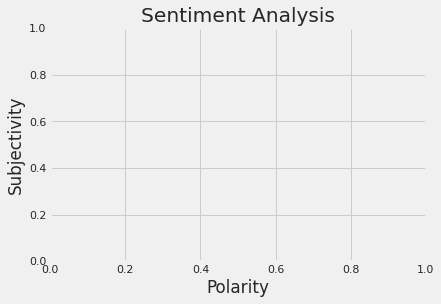

In [325]:
# plt.scatter(x,y,color) 
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [326]:
# Print the percentage of positive tweets
ptweets = final_text_NY[final_text_CA.Analysis == 'Positive']   ###############
ptweets = ptweets['text']
ptweets

round( (ptweets.shape[0] / final_text_NY.shape[0]) * 100 , 1)   ###############

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



IndexingError: ignored

In [327]:
# Print the percentage of negative tweets
ntweets = final_text_NY[final_text_NY.Analysis == 'Negative']  #############
ntweets = ntweets['text']
ntweets

round( (ntweets.shape[0] / final_text_NY.shape[0]) * 100, 1)   #############

30.2

In [328]:
# Show the value counts  ############
final_text_NY['Analysis'].value_counts()

Neutral     245695
Negative    144061
Positive     87981
Name: Analysis, dtype: int64

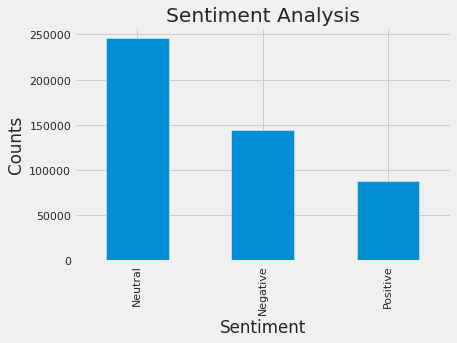

In [331]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
final_text_NY['Analysis'].value_counts().plot(kind = 'bar')    ##########
plt.show()

# Using Machine Learning to analyze text

In [ ]:
import nltk


### Time series analysis

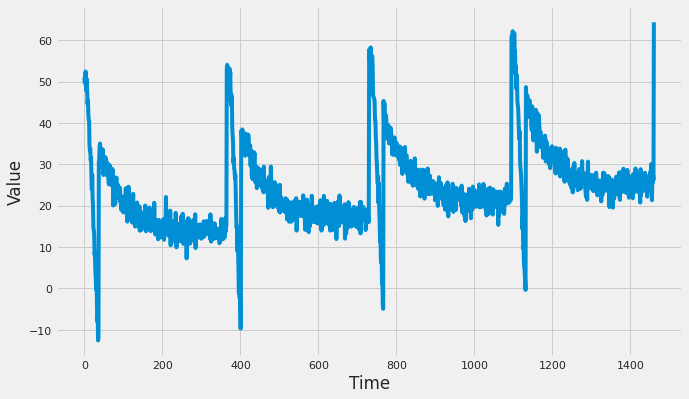

In [332]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.1,
                    np.cos(season_time * 7 * np.pi),
                    1 / np.exp(5 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, 0.1)  
baseline = 10
amplitude = 40
slope = 0.01
noise_level = 2

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=42)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

# EXPECTED OUTPUT
# Chart as in the screencast. First should have 5 distinctive 'peaks'

In [358]:
data = NY_df.rolling(10).mean(dates=['created_at'], freq="W",columns=["number_of_tweets", "Cases", "Hospitalized", "Deaths"])  
data.dropna() 
trend = NY_df

,created_at,Cases,Hospitalized,Deaths,number_of_tweets
4,2020-03-05,3,20,0,181
5,2020-03-06,8,18,0,2495
6,2020-03-07,7,15,0,3082
7,2020-03-08,21,17,0,3758
8,2020-03-09,58,49,0,4767
9,2020-03-10,70,63,0,6466
10,2020-03-11,155,90,1,10071
11,2020-03-12,357,92,0,19356
12,2020-03-13,620,156,0,9920
13,2020-03-14,644,159,2,12991


In [421]:
NY_df.columns = ['created_at', 'Cases', 'Hospitalized', 'Deaths', 'number_of_tweets']


In [81]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [82]:
df = NY_df
train_dates = pd.to_datetime(df['created_at'])

In [83]:
#Variables for training
cols = list(df)[1:6]
df_for_training = df[cols].astype(float)

# df_for_plot=df_for_training.tail(5000)
# df_for_plot.plot.line()

In [84]:
#LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized
# normalize the dataset
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [85]:
#As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features. 
#In this example, the n_features is 2. We will make timesteps = 3. 
#With this, the resultant n_samples is 5 (as the input data has 9 rows).
trainX = []
trainY = []

In [95]:
n_future = 365   # Number of days we want to predict into the future
n_past = 14    # Number of past days we want to use to predict the future

In [96]:
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))


# define Autoencoder model

model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()


trainX shape == (29, 14, 4).
trainY shape == (29, 1).
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 14, 64)            17664     
_________________________________________________________________
lstm_7 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 30,113
Trainable params: 30,113
Non-trainable params: 0
_________________________________________________________________


In [104]:
# fit model
history = model.fit(trainX, trainY, epochs=50, batch_size=4, validation_split=0.2, verbose=1)

Epoch 1/50
6/6 [==============================] - 0s 23ms/step - loss: 0.1422 - val_loss: 0.4654
Epoch 2/50
6/6 [==============================] - 0s 15ms/step - loss: 0.1499 - val_loss: 0.4602
Epoch 3/50
6/6 [==============================] - 0s 17ms/step - loss: 0.1573 - val_loss: 0.4677
Epoch 4/50
6/6 [==============================] - 0s 16ms/step - loss: 0.1337 - val_loss: 0.4753
Epoch 5/50
6/6 [==============================] - 0s 16ms/step - loss: 0.1524 - val_loss: 0.4719
Epoch 6/50
6/6 [==============================] - 0s 16ms/step - loss: 0.1528 - val_loss: 0.4737
Epoch 7/50
6/6 [==============================] - 0s 15ms/step - loss: 0.1613 - val_loss: 0.4725
Epoch 8/50
6/6 [==============================] - 0s 16ms/step - loss: 0.1318 - val_loss: 0.4826
Epoch 9/50
6/6 [==============================] - 0s 16ms/step - loss: 0.1263 - val_loss: 0.4587
Epoch 10/50
6/6 [==============================] - 0s 16ms/step - loss: 0.1582 - val_loss: 0.4672
Epoch 11/50
6/6 [============

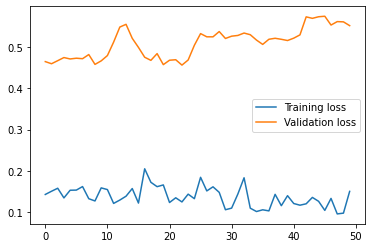

In [105]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [106]:
df

,created_at,Cases,Hospitalized,Deaths,number_of_tweets
4,2020-03-05,3,20,0,181
5,2020-03-06,8,18,0,2495
6,2020-03-07,7,15,0,3082
7,2020-03-08,21,17,0,3758
8,2020-03-09,58,49,0,4767
9,2020-03-10,70,63,0,6466
10,2020-03-11,155,90,1,10071
11,2020-03-12,357,92,0,19356
12,2020-03-13,620,156,0,9920
13,2020-03-14,644,159,2,12991


In [107]:
#Forecasting...
#Start with the last day in training date and predict future...
n_future=29  #Redefining n_future to extend prediction dates beyond original n_future dates...
forecast_period_dates = pd.date_range(list(train_dates)[-1], periods=n_future, freq='1d').tolist()

forecast = model.predict(trainX[-n_future:]) #forecast 

#Perform inverse transformation to rescale back to original range
#Since we used 5 variables for transform, the inverse expects same dimensions
#Therefore, let us copy our values 5 times and discard them after inverse transform
forecast_copies = np.repeat(forecast, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(forecast_copies)[:,0]


In [108]:
# Convert timestamp to date
forecast_dates = []
for time_i in forecast_period_dates:
    forecast_dates.append(time_i.date())
  

In [109]:

df_forecast = pd.DataFrame({'created_at':np.array(forecast_dates), 'Cases':y_pred_future})
# s = pd.Series(np.random.randn(5),index=labels)

In [ ]:
# len(forecast_copies)
# forecast_copies

In [78]:
# df_forecast['created_at']=pd.to_datetime(df_forecast['created_at'])

In [ ]:
# forecast_dates, y_pred_future

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


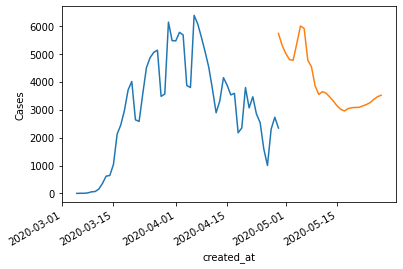

In [111]:
original = df[['created_at', 'Cases']]
original['created_at']=pd.to_datetime(original['created_at'])
original = original.loc[original['created_at'] >= '2020-3-1']

sns.lineplot(original['created_at'], original['Cases'])
sns.lineplot(df_forecast['created_at'], df_forecast['Cases'])
plt.gcf().autofmt_xdate()

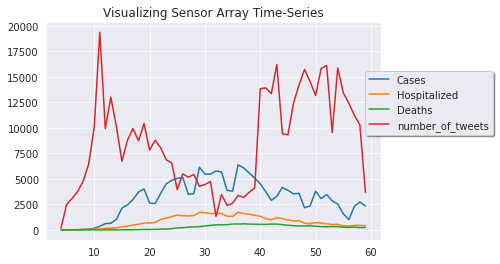

In [117]:
# Importing libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sb

# Importing Dataset
df =  NY_df
ds = df.drop(['created_at'], axis = 1)

# Visualize the trends in data
sb.set_style('darkgrid')
ds.plot(kind = 'line', legend = 'reverse', title = 'Visualizing Sensor Array Time-Series')
plt.legend(loc = 'upper right', shadow = True, bbox_to_anchor = (1.35, 0.8))
plt.show()

# Dropping Temperature & Relative Humidity as they do not change with Time
# ds.drop(['Temperature','Rel_Humidity'], axis = 1, inplace = True)

# Again Visualizing the time-series data
# sb.set_style('darkgrid')
# ds.plot(kind = 'line', legend = 'reverse', title = 'Visualizing Sensor Array Time-Series')
# plt.legend(loc = 'upper right', shadow = True, bbox_to_anchor = (1.35, 0.8))
# plt.show()

In [119]:
# Splitting the dataset into train & test subsets
n_obs = 45
ds_train, ds_test = ds[:-n_obs], ds[-n_obs:]

# Augmented Dickey-Fuller Test (ADF Test) to check for stationarity
from statsmodels.tsa.stattools import adfuller

def adf_test(ds):
    dftest = adfuller(ds, autolag='AIC')
    adf = pd.Series(dftest[0:4], index = ['Test Statistic','p-value','# Lags','# Observations'])

    for key, value in dftest[4].items():
       adf['Critical Value (%s)'%key] = value
    print (adf)

    p = adf['p-value']
    if p <= 0.05:
        print("\nSeries is Stationary")
    else:
        print("\nSeries is Non-Stationary")


for i in ds_train.columns:
    print("Column: ",i)
    print('--------------------------------------')
    adf_test(ds_train[i])
    print('\n')

# Differencing all variables to get rid of Stationarity
ds_differenced = ds_train.diff().dropna()

# Running the ADF test once again to test for Stationarity
for i in ds_differenced.columns:
    print("Column: ",i)
    print('--------------------------------------')
    adf_test(ds_differenced[i])
    print('\n')

# Now cols: 3, 5, 6, 8 are non-stationary
ds_differenced = ds_differenced.diff().dropna()

# Running the ADF test for the 3rd time to test for Stationarity
for i in ds_differenced.columns:
    print("Column: ",i)
    print('--------------------------------------')
    adf_test(ds_differenced[i])
    print('\n')

Column:  Cases
--------------------------------------
Test Statistic          2.785864
p-value                 1.000000
# Lags                  3.000000
# Observations          7.000000
Critical Value (1%)    -4.938690
Critical Value (5%)    -3.477583
Critical Value (10%)   -2.843868
dtype: float64

Series is Non-Stationary


Column:  Hospitalized
--------------------------------------
Test Statistic          1.217225
p-value                 0.996103
# Lags                  1.000000
# Observations          9.000000
Critical Value (1%)    -4.473135
Critical Value (5%)    -3.289881
Critical Value (10%)   -2.772382
dtype: float64

Series is Non-Stationary


Column:  Deaths
--------------------------------------
Test Statistic          4.000000
p-value                 1.000000
# Lags                  3.000000
# Observations          7.000000
Critical Value (1%)    -4.938690
Critical Value (5%)    -3.477583
Critical Value (10%)   -2.843868
dtype: float64

Series is Non-Stationary


Column: 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


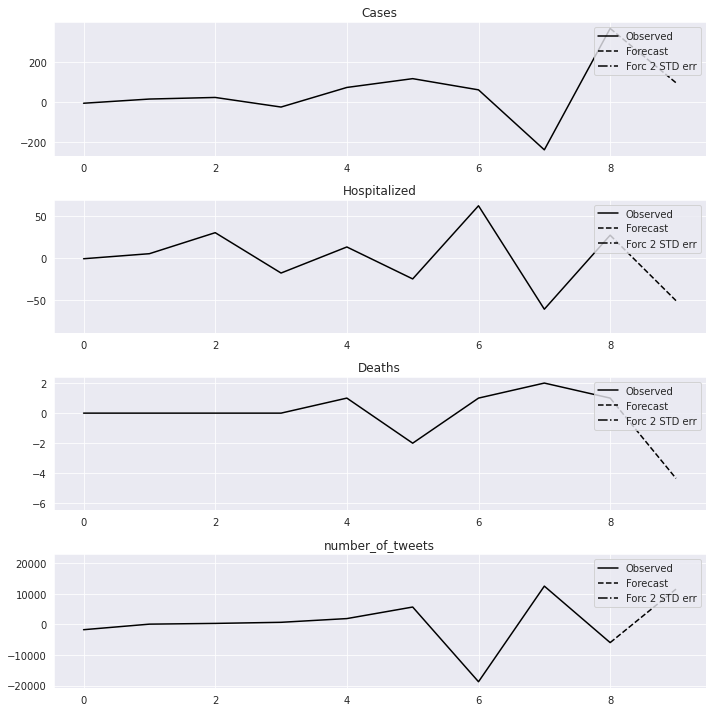

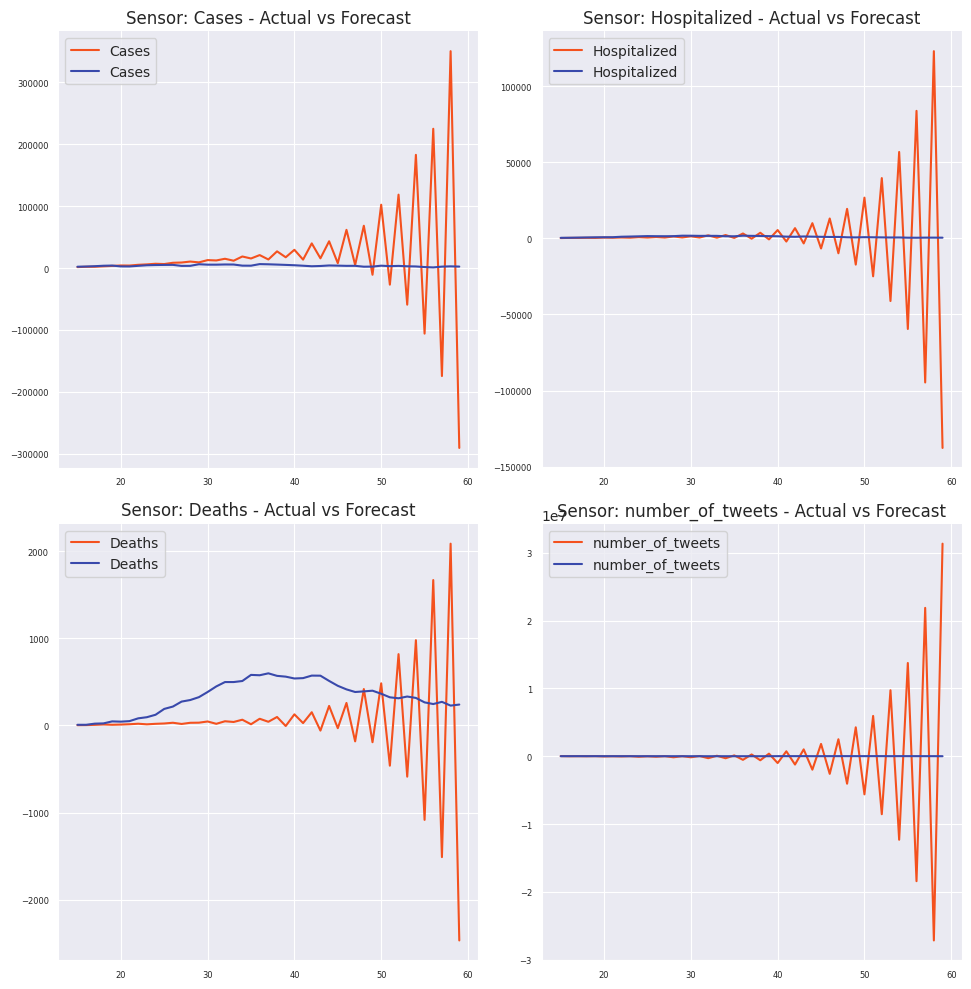

In [167]:
# Fitting the VAR model to the 2nd Differenced Data
from statsmodels.tsa.api import VAR


model = VAR(ds_differenced)


results = model.fit(maxlags=1, method='ols', ic='aic', trend='c', verbose=False)
results.summary()

# Forecasting for 100 steps ahead
lag_order = results.k_ar
predicted = results.forecast(ds_differenced.values[-lag_order:], n_obs)
forecast = pd.DataFrame(predicted, index = ds.index[-n_obs:], columns = ds.columns)

# Plotting the Forecasted values
p1 = results.plot_forecast(1)
p1.tight_layout()

# Inverting the Differencing Transformation
def invert_transformation(ds, df_forecast, second_diff=False):
    for col in ds.columns:
        # Undo the 2nd Differencing
        if second_diff:
            df_forecast[str(col)] = (ds[col].iloc[-1] - ds[col].iloc[-2]) + df_forecast[str(col)].cumsum()

        # Undo the 1st Differencing
        df_forecast[str(col)] = ds[col].iloc[-1] + df_forecast[str(col)].cumsum()

    return df_forecast

forecast_values = invert_transformation(ds_train, forecast, second_diff=True)

# ======================================   Visualization  ==========================================
# Actual vs Forecasted Plots
fig, axes = plt.subplots(nrows = int(len(ds.columns)/2), ncols = 2, dpi = 100, figsize = (10,10))

for i, (col,ax) in enumerate(zip(ds.columns, axes.flatten())):
    forecast_values[col].plot(color = '#F4511E', legend = True, ax = ax).autoscale(axis =' x',tight = True)
    ds_test[col].plot(color = '#3949AB', legend = True, ax = ax)

    ax.set_title('Sensor: ' + col + ' - Actual vs Forecast')
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize = 6)

plt.tight_layout()
plt.savefig('actual_forecast.png')
plt.show()

# MSE
from sklearn.metrics import mean_squared_error
from numpy import asarray as arr
mse = mean_squared_error(ds_test, forecast_values)

In [168]:
from sklearn.metrics import mean_squared_error
from numpy import asarray as arr
mse = mean_squared_error(ds_test, forecast_values)

print("\nMean Squared Error: ", mse)


Mean Squared Error:  17636422756432.574
